1. Predict optimum number of clusters 
2. Represent it visually

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from xgboost import XGBClassifier,plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_iris = pd.read_csv("../Task 6/Iris.csv")
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df_iris.drop(['Id','Species'],axis=1)
y = df_iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

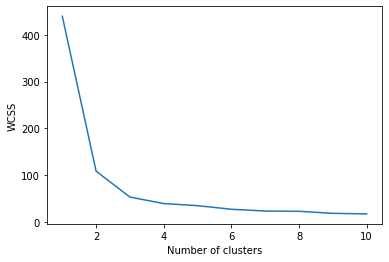

In [4]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init="k-means++", random_state=42)
    km.fit(X_train, y_train)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# The elbow is made at 3, so k = 3, which is the optimum number of clusters

In [18]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

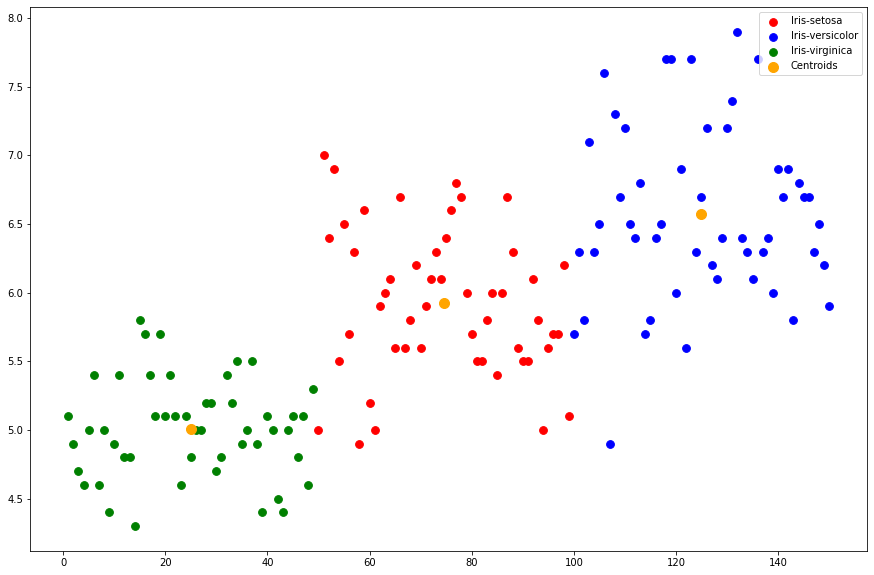

In [22]:
x = df_iris.iloc[:, [0, 1, 2, 3]].values
km = KMeans(n_clusters=3, init="k-means++", random_state=42)
km.fit(x)
y_pred = km.predict(x)

plt.figure(figsize=(15,10))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 60, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 60, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 60, c = 'green', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'orange', label = 'Centroids')
plt.legend()